Imports

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import os
import matplotlib.pyplot as plt
from PIL import Image
import time

In [2]:
PATH = os.path.abspath(os.getcwd())
IMG_PATH = os.path.join(PATH, 'images')
TRAIN_PATH = os.path.join(IMG_PATH, 'train')
TEST_PATH = os.path.join(IMG_PATH, 'test')
classes = ['kangaroo', 'yak']
mapping =  {animal : i for i, animal in enumerate(classes)}
inverse_mapping =  {i : animal for i, animal in enumerate(classes)}

def summarize_diagnostics(history):
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	# plt.plot(history.history['val_loss'], color='orange', label='test')

	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	# plt.plot(history.history['val_accuracy'], color='orange', label='test')

	plt.show()

Displaying the dataset

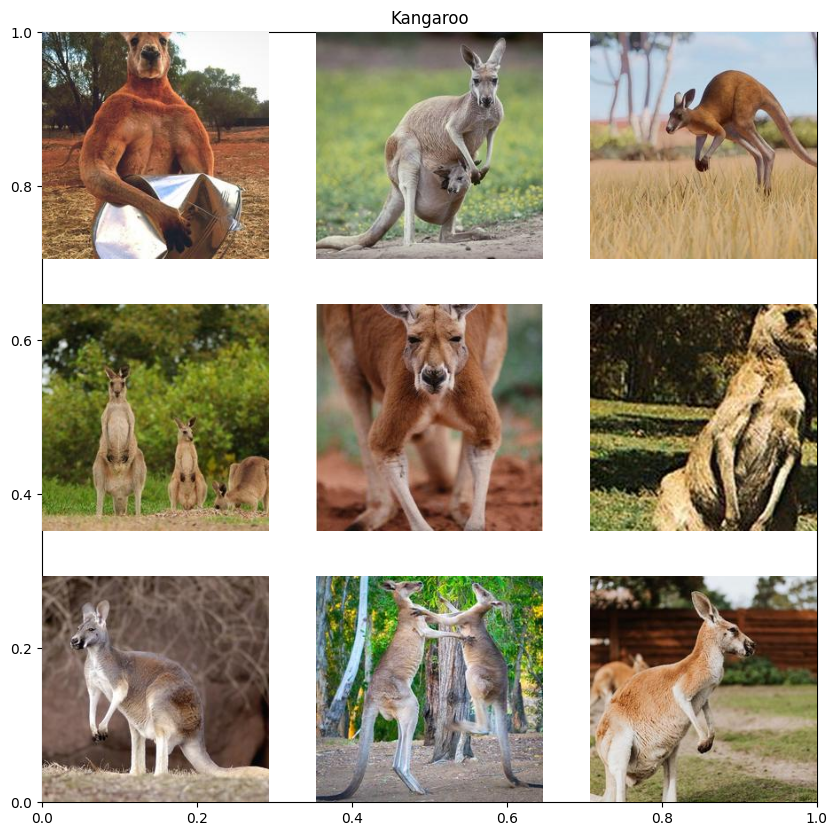

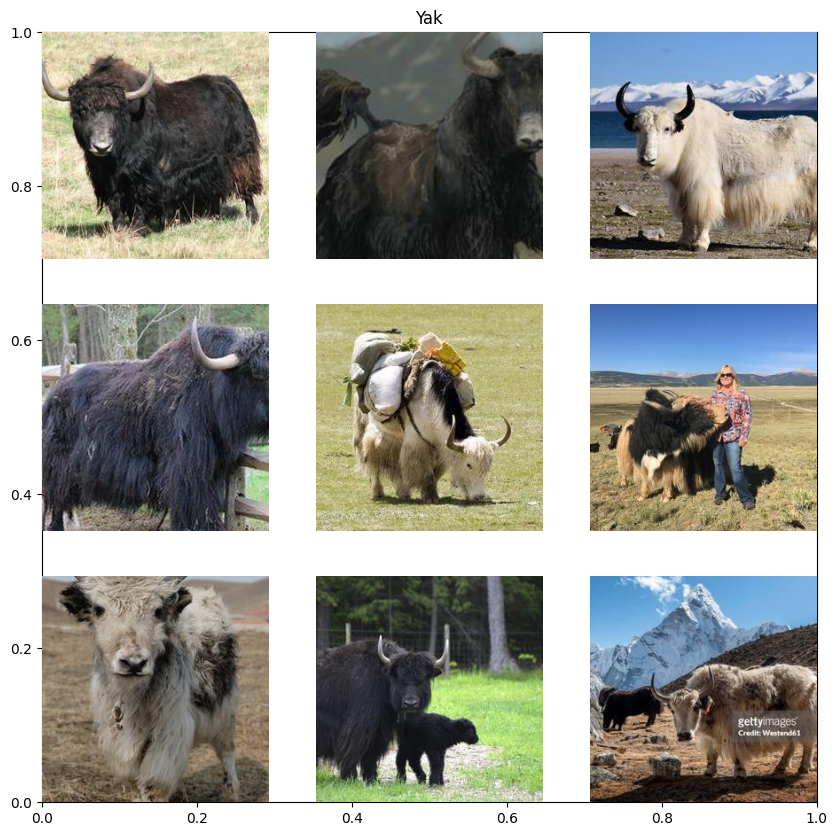

In [3]:
for animal in classes:
    folder = os.path.join(TRAIN_PATH, animal)
    plt.figure(figsize=(10, 10))
    plt.title(animal.capitalize())
    for i, filename in enumerate(os.listdir(folder)[:9]):
        img_path = os.path.join(folder, filename)
        image = Image.open(img_path)
        plt.subplot(330 + 1 + i)
        plt.imshow(image)
        plt.axis('off')
    
    plt.show()

Loading the dataset to the memory

In [4]:
def load_images(folder_path):
    photos, labels = [], []
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith('.jpg'):
                    img_path = os.path.join(subdir_path, filename)
                    image = load_img(img_path)
                    image_array = img_to_array(image)
                    photos.append(image_array)
                    labels.append(mapping[subdir])
    return np.asarray(photos) / 255.0, np.asarray(labels)

train_photos, train_labels = load_images(TRAIN_PATH)
test_photos, test_labels = load_images(TEST_PATH)

if not os.path.exists('train_photos.npy'):
    np.save('train_photos.npy', train_photos)
    print("Saved 'train_photos.npy'")

if not os.path.exists('train_labels.npy'):
    np.save('train_labels.npy', train_labels)
    print("Saved 'train_labels.npy'")

if not os.path.exists('test_photos.npy'):
    np.save('test_photos.npy', test_photos)
    print("Saved 'test_photos.npy'")

if not os.path.exists('test_labels.npy'):
    np.save('test_labels.npy', test_labels)
    print("Saved 'test_labels.npy'")

print(f'Training images shape: {train_photos.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Test images shape: {test_photos.shape}')
print(f'Test labels shape: {test_labels.shape}')

Training images shape: (160, 256, 256, 3)
Training labels shape: (160,)
Test images shape: (40, 256, 256, 3)
Test labels shape: (40,)


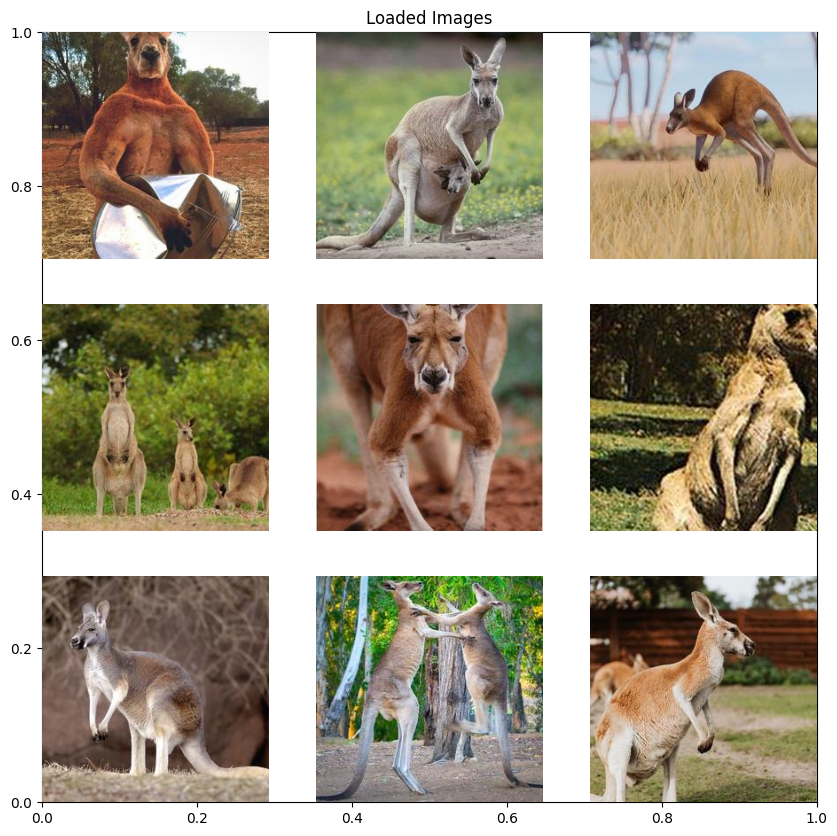

In [5]:
train_photos = np.load('train_photos.npy')

plt.figure(figsize=(10, 10))
plt.title('Loaded Images')

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_photos[i])
    plt.axis('off')

plt.show()

In [6]:
train_photos = np.load('train_photos.npy')
train_labels = np.load('train_labels.npy')
test_photos = np.load('test_photos.npy')
test_labels = np.load('test_labels.npy')

VGG1

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4961 - loss: 5.2458
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5080 - loss: 0.7654
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5293 - loss: 0.6927
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.5247 - loss: 0.6893
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6863 - loss: 0.6261
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7680 - loss: 0.5481
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8139 - loss: 0.4350
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8378 - loss: 0.4784
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8080 - loss: 0.4665
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8692 - loss: 0.3588
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8198 - loss: 0.3819
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy:

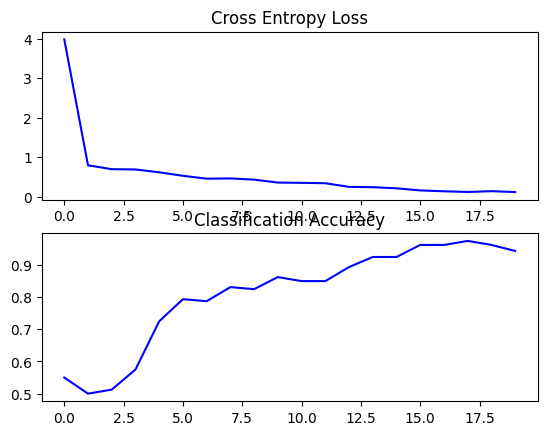

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,220,036 (512.01 MB)

 Trainable params: 67,110,017 (256.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,110,019 (256.00 MB)

In [7]:
def vgg1():
	model = Sequential()
	model.add(Input(shape=(256, 256, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

vgg1_model = vgg1()

start_time = time.time()
history = vgg1_model.fit(
    train_photos, train_labels,
    epochs=20,
    batch_size=16,
    verbose=1
)
end_time = time.time()

_, acc = vgg1_model.evaluate(test_photos, test_labels, verbose=1)
print('Test Accuracy: %.3f' % (acc * 100.0))
print('Time taken:', end_time - start_time)
summarize_diagnostics(history)
vgg1_model.summary()

## VGG3 without data augmentation

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5145 - loss: 0.8968
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6852 - loss: 0.7250
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6335 - loss: 0.5880
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7908 - loss: 0.4899
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.7325 - loss: 0.5040
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.7232 - loss: 0.5160
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.6876 - loss: 0.5760
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.8131 - loss: 0.4249
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8391 - loss: 0.3803
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8695 - loss: 0.3476
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.8179 - loss: 0.3772
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step

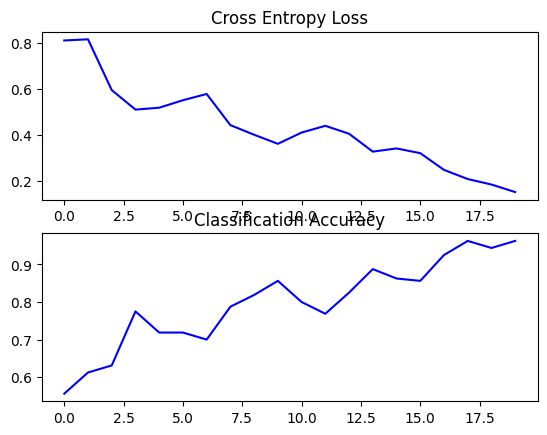

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,741,444 (128.71 MB)

 Trainable params: 16,870,721 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,870,723 (64.36 MB)

In [8]:
def vgg3():
	model = Sequential()
	model.add(Input(shape=(256, 256, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

vgg3_no_aug = vgg3()

start_time = time.time()
history = vgg3_no_aug.fit(
    train_photos, train_labels,
    epochs=20,
    batch_size=16,
    verbose=1
)
end_time = time.time()

_, acc = vgg3_no_aug.evaluate(test_photos, test_labels, verbose=1)
print('Test Accuracy: %.3f' % (acc * 100.0))
print('Time taken:', end_time - start_time)
summarize_diagnostics(history)
vgg3_no_aug.summary()

## VGG3 with data augmentation

c:\Users\Nishchay\Desktop\College\ES 335 Machine Learning\Assignments\es335-24-fall-assignment-4\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.4577 - loss: 1.4506
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5139 - loss: 0.6910
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6111 - loss: 0.6674
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.6404 - loss: 0.6095
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.7519 - loss: 0.5657
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.7652 - loss: 0.5357
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.7013 - loss: 0.5687
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.7220 - loss: 0.5492
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.7819 - loss: 0.4934
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.6933 - loss: 0.5542
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.7514 - loss: 0.5305
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step

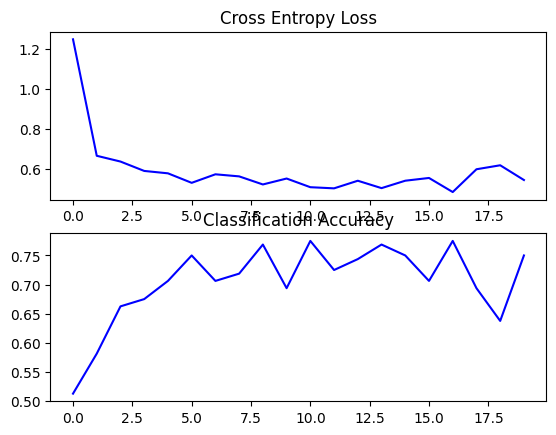

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,741,444 (128.71 MB)

 Trainable params: 16,870,721 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,870,723 (64.36 MB)

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    train_photos, train_labels,
    batch_size=16
)

vgg3_with_aug = vgg3()

start_time = time.time()
history = vgg3_with_aug.fit(
    train_generator,
    epochs=20,
    verbose=1,
)
end_time = time.time()

_, acc = vgg3_with_aug.evaluate(test_photos, test_labels, verbose=1)
print('Test Accuracy: %.3f' % (acc * 100.0))
print('Time taken:', end_time - start_time)
summarize_diagnostics(history)
vgg3_with_aug.summary()

## Transfer learning using VGG16 with tuning all layers (including tuning convolution layers)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4671 - loss: 0.7198
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6493 - loss: 0.6117
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9048 - loss: 0.4757
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9281 - loss: 0.3420
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9637 - loss: 0.2578
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9745 - loss: 0.1849
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9864 - loss: 0.1177
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9849 - loss: 0.0850
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 1.0000 - loss: 0.0701
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 0.0535
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 1.0000 - loss: 0.0354
Epoch 12/20
10/10 ━━━━

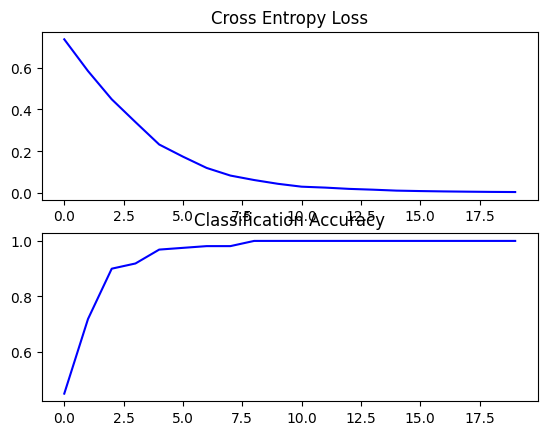

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,818,500 (144.27 MB)

 Trainable params: 18,909,249 (72.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,909,251 (72.13 MB)

In [10]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16.layers:
    layer.trainable = True

vgg16_all_layers_tuned = Sequential()
vgg16_all_layers_tuned.add(vgg16)
vgg16_all_layers_tuned.add(Flatten())
vgg16_all_layers_tuned.add(Dense(128, activation='relu'))
vgg16_all_layers_tuned.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=1e-4, momentum=0.9)
vgg16_all_layers_tuned.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = vgg16_all_layers_tuned.fit(
    train_photos, train_labels,
    epochs=20,
    batch_size=16,
    verbose=1
)
end_time = time.time()

_, acc = vgg16_all_layers_tuned.evaluate(test_photos, test_labels, verbose=1)
print('Test Accuracy: %.3f' % (acc * 100.0))
print('Time taken:', end_time - start_time)
summarize_diagnostics(history)
vgg16_all_layers_tuned.summary()

## Transfer learning using VGG16 with tuning only final MLP layers (excluding convolution layers)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - accuracy: 0.4195 - loss: 0.7793
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.5761 - loss: 0.6811
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 0.7943 - loss: 0.5572
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 540ms/step - accuracy: 0.7932 - loss: 0.5093
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 670ms/step - accuracy: 0.8932 - loss: 0.4251
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 679ms/step - accuracy: 0.8442 - loss: 0.3757
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 674ms/step - accuracy: 0.8214 - loss: 0.4057
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 771ms/step - accuracy: 0.9110 - loss: 0.3283
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 784ms/step - accuracy: 0.9362 - loss: 0.2836
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 795ms/step - accuracy: 0.9566 - loss: 0.2522
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 803ms/step - accuracy: 0.9735 - loss: 0.2612
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 798ms/step

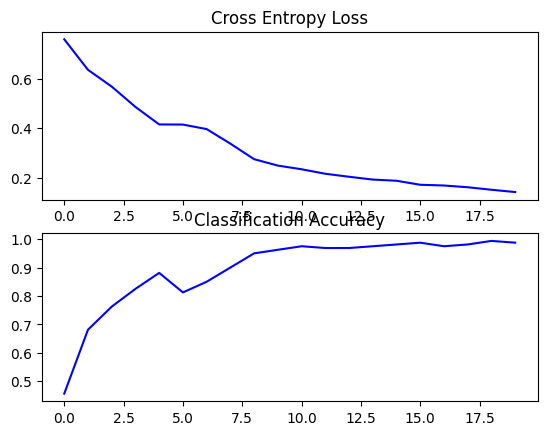

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,812 (88.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 4,194,563 (16.00 MB)

In [11]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16.layers:
    layer.trainable = False

vgg16_mlp_layer_tuned = Sequential()
vgg16_mlp_layer_tuned.add(vgg16)
vgg16_mlp_layer_tuned.add(Flatten())
vgg16_mlp_layer_tuned.add(Dense(128, activation='relu'))
vgg16_mlp_layer_tuned.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=1e-4, momentum=0.9)
vgg16_mlp_layer_tuned.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = vgg16_mlp_layer_tuned.fit(
    train_photos, train_labels,
    epochs=20,
    batch_size=16,
    verbose=1
)
end_time = time.time()

_, acc = vgg16_mlp_layer_tuned.evaluate(test_photos, test_labels, verbose=1)
print('Test Accuracy: %.3f' % (acc * 100.0))
print('Time taken:', end_time - start_time)
summarize_diagnostics(history)
vgg16_mlp_layer_tuned.summary()

In [1]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with default settings (include the top fully connected layers)
vgg16 = VGG16(weights='imagenet')

# Print the architecture
vgg16.summary()


ModuleNotFoundError: No module named 'tensorflow'